In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import uniform

In [74]:
##Importing data
train_feats=pd.read_csv('train_features.csv')
target=pd.read_csv('infection_probablity.csv')
test_feats=pd.read_csv('test_features.csv')
test_id=pd.read_csv('test_id.csv')

In [73]:
## Splitting dataset intro training and validation datasets
X=train_feats.values
Y=target.values
validation_size=.2
seed=7
X_test=test_feats.values
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

## Simple linear models


In [64]:
models = []
models.append(( ' LR ' , LinearRegression()))
models.append(( ' LASSO ' , Lasso()))
models.append(( ' EN ' , ElasticNet()))
scoring='neg_mean_squared_error'
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=5, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/home/kartik/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


 LR : -86.402703 (4.225850)
 LASSO : -96.598131 (4.297886)
 EN : -99.174137 (4.402426)


/home/kartik/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/kartik/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [65]:
##Conclusion: Out of three, liner regression works best on training data let see its effectivness on validation data
model= LinearRegression()
model.fit(X_train,Y_train)
#prediction=model.predict(X_validation)
print("Linear Regrssion results:")
print("Training MSE: {}".format(mean_squared_error(model.predict(X_train),Y_train)))
print("Validation MSE: {}".format(mean_squared_error(model.predict(X_validation),Y_validation)))

Linear Regrssion results:
Training MSE: 84.18114454875732
Validation MSE: 80.53279612616788


## Ensemble methods

In [66]:
#Cheking ensemble technique random forest.
model= RandomForestRegressor()
model.fit(X_train,Y_train)
#prediction=model.predict(X_validation)
print("Random Forest regressor results:")
print("Training MSE: {}".format(mean_squared_error(model.predict(X_train),Y_train)))
print("Validation MSE: {}".format(mean_squared_error(model.predict(X_validation),Y_validation)))

/home/kartik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Random Forest regressor results:
Training MSE: 11.968776612066108
Validation MSE: 80.23369476972651


### Conclusion:
It appears that random forest is quite overfitting on the data
May be hyper parameter tuning can help in reducing overfitting.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
est=RandomForestRegressor(n_estimators=100)
#est=GradientBoostingRegressor()
param_grid = { 'max_depth':[2,3,4,5]}
model = RandomizedSearchCV(estimator=est, param_distributions=param_grid, n_iter=100,
random_state=7)
model.fit(X_train, Y_train)

print("Random Forest regressor results:")
print("Training MSE: {}".format(mean_squared_error(model.predict(X_train),Y_train)))
print("Validation MSE: {}".format(mean_squared_error(model.predict(X_validation),Y_validation)))

print(model.best_score_)
print(model.best_estimator_)

In [67]:
#Optimized Random forest regressor
model= RandomForestRegressor(n_estimators=100,max_depth=4)
model.fit(X_train,Y_train)
#prediction=model.predict(X_validation)
print("Random Forest regressor results:")
print("Training MSE: {}".format(mean_squared_error(model.predict(X_train),Y_train)))
print("Validation MSE: {}".format(mean_squared_error(model.predict(X_validation),Y_validation)))

/home/kartik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Random Forest regressor results:
Training MSE: 80.8206871611731
Validation MSE: 78.86360398628628


## XgBoost

In [69]:
from xgboost import plot_importance
import xgboost as xgb

RMSE for xgboost: 143.77


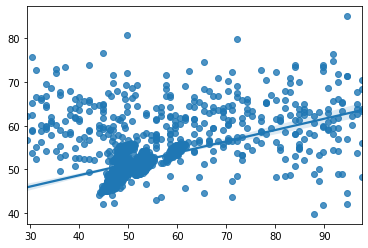

In [70]:
def rmse(a,b):
    return np.mean((a-b)**2)

params = {
    'booster': 'gbtree',
    'objective': 'reg:gamma',
    'gamma': 0.1,
    'max_depth': 4,
    'lambda': 3,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'silent': 1,
    'eta': 0.1,
    'seed': 1000,
    'nthread': 4,
}

plst = params.items()
dtrain = xgb.DMatrix(X_train, Y_train)
dtest = xgb.DMatrix(X_validation)
num_rounds = 500
xgb_model = xgb.train(plst, dtrain, num_rounds)
yt_xgb = xgb_model.predict(dtest)
rmse_xgb = rmse(Y_validation, yt_xgb)
sns.regplot(Y_validation, yt_xgb)
print("RMSE for xgboost: %.2f" % rmse_xgb)

In [59]:
from tpot import TPOTRegressor

In [60]:
model = TPOTRegressor(generations=8, population_size=50, verbosity=2)
model.fit(X_train[:100], Y_train[:100])
model.score(X_validation, Y_validation)

/home/kartik/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Generation 1 - Current best internal CV score: -63.57068496684548
Generation 2 - Current best internal CV score: -60.0749214164558
Generation 3 - Current best internal CV score: -59.882464623957745
Generation 4 - Current best internal CV score: -59.882464623957745
Generation 5 - Current best internal CV score: -59.8698730196907
Generation 6 - Current best internal CV score: -59.8698730196907
Generation 7 - Current best internal CV score: -59.823303223429434
Generation 8 - Current best internal CV score: -59.823303223429434

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.8, min_samples_leaf=10, min_samples_split=10, n_estimators=100)


/home/kartik/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-80.92977819103066

In [9]:
model=RandomForestRegressor( bootstrap=False, max_features=0.7000000000000001, min_samples_leaf=10, min_samples_split=9, n_estimators=100)
model.fit(X_train,Y_train)
#prediction=model.predict(X_validation)
print("Random Forest regressor results:")
print("Training MSE: {}".format(mean_squared_error(model.predict(X_train),Y_train)))
print("Validation MSE: {}".format(mean_squared_error(model.predict(X_validation),Y_validation)))

/home/kartik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest regressor results:
Training MSE: 50.86758327075621
Validation MSE: 83.3551685771411


In [55]:
# Multilayer Perceptron
#from keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Dense, Dropout
model=Sequential()
model.add(Dense(128,input_shape=(116,),activation='relu'))
model.add(Dropout(.3))
model.add(Dense(64,activation='relu'))
model.add(Dense(1))
# summarize layers
print(model.summary())
# plot graph
#plot_model(model)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 128)               14976     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 65        
Total params: 23,297
Trainable params: 23,297
Non-trainable params: 0
_________________________________________________________________
None


Train on 8571 samples, validate on 2143 samples
Epoch 1/100
8571/8571 [==============================] - 1s 61us/step - loss: 502.0382 - mse: 502.0384 - val_loss: 82.7668 - val_mse: 82.7668
Epoch 2/100
8571/8571 [==============================] - 0s 34us/step - loss: 101.4477 - mse: 101.4477 - val_loss: 81.6215 - val_mse: 81.6215
Epoch 3/100
8571/8571 [==============================] - 0s 34us/step - loss: 100.1427 - mse: 100.1427 - val_loss: 82.5055 - val_mse: 82.5055
Epoch 4/100
8571/8571 [==============================] - 0s 34us/step - loss: 97.6541 - mse: 97.6541 - val_loss: 83.7054 - val_mse: 83.7054
Epoch 5/100
8571/8571 [==============================] - 0s 35us/step - loss: 97.8475 - mse: 97.8475 - val_loss: 80.5410 - val_mse: 80.5410
Epoch 6/100
8571/8571 [==============================] - 0s 35us/step - loss: 97.7417 - mse: 97.7417 - val_loss: 80.4794 - val_mse: 80.4794
Epoch 7/100
8571/8571 [==============================] - 0s 33us/step - loss: 95.9882 - mse: 95.9882 - val

8571/8571 [==============================] - 0s 33us/step - loss: 81.2467 - mse: 81.2467 - val_loss: 83.6876 - val_mse: 83.6876
Epoch 59/100
8571/8571 [==============================] - 0s 32us/step - loss: 80.5528 - mse: 80.5528 - val_loss: 85.3660 - val_mse: 85.3660
Epoch 60/100
8571/8571 [==============================] - 0s 32us/step - loss: 81.4758 - mse: 81.4759 - val_loss: 84.0587 - val_mse: 84.0587
Epoch 61/100
8571/8571 [==============================] - 0s 32us/step - loss: 80.3470 - mse: 80.3470 - val_loss: 84.2908 - val_mse: 84.2909
Epoch 62/100
8571/8571 [==============================] - 0s 31us/step - loss: 79.7500 - mse: 79.7500 - val_loss: 84.9615 - val_mse: 84.9615
Epoch 63/100
8571/8571 [==============================] - 0s 31us/step - loss: 80.0422 - mse: 80.0422 - val_loss: 84.6204 - val_mse: 84.6204
Epoch 64/100
8571/8571 [==============================] - 0s 31us/step - loss: 80.5213 - mse: 80.5213 - val_loss: 85.6814 - val_mse: 85.6814
Epoch 65/100
8571/8571 [==

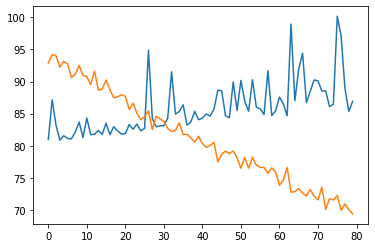

In [56]:
model.compile('rmsprop', loss='mse', metrics=['mse'])
history=model.fit(X_train,Y_train,batch_size=64,epochs=100,validation_data=(X_validation,Y_validation))
plt.plot(history.history['val_loss'][20:],label='Validation loss')
plt.plot(history.history['loss'][20:],label='Training loss')
plt.show()

## Conclusion-
Out of all the different ML and DL algorithms used so far random forest gives best fit and generalization. Use of genetic algorithms and random search in hyper parameter space gave better generalization as compared to simple linear model.


In [68]:
#Optimized Random forest regressor
model= RandomForestRegressor(n_estimators=100,max_depth=4)
model.fit(X_train,Y_train)
#prediction=model.predict(X_validation)
print("Random Forest regressor results:")
print("Training MSE: {}".format(mean_squared_error(model.predict(X_train),Y_train)))
print("Validation MSE: {}".format(mean_squared_error(model.predict(X_validation),Y_validation)))

/home/kartik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Random Forest regressor results:
Training MSE: 80.95957165481065
Validation MSE: 79.19747996969991


As can be seen MSE on validation dataset is smaller as compared to training dataset and MSE obtained is smaller as compared to linear regression, xgboost, multilayer perceptron.

## Predictions

In [81]:
#Optimized Random forest regressor
model= RandomForestRegressor(n_estimators=100,max_depth=4)
model.fit(X,Y)
prediction=model.predict(X_test)
submission=pd.concat([pd.DataFrame(test_id,columns=['people_ID']),pd.DataFrame(prediction,columns=['infect_prob'])],axis=1)
#prediction=model.predict(X_validation)
#print("Random Forest regressor results:")
#print("Training MSE: {}".format(mean_squared_error(model.predict(X_train),Y_train)))
#print("Validation MSE: {}".format(mean_squared_error(model.predict(X_validation),Y_validation)))

/home/kartik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [82]:
submission.to_csv('submission-part1.csv',index=False)